In [1]:
import pandas as pd

df = pd.read_csv('../results/mnist-benchmark.csv')
df['method'] = 'top_block_range'

df.head()

,query_time,recall,g_range,l_range,method
0,0.014884,0.4236,3,1,top_block_range
1,0.030289,0.5809,3,3,top_block_range
2,0.041731,0.6132,3,5,top_block_range
3,0.046788,0.6200,3,7,top_block_range
4,0.021938,0.5500,5,1,top_block_range


In [2]:
threshold_df = pd.read_csv('../results/mnist-benchmark-threshold.csv')
threshold_df['method'] = 'threshold'

threshold_df.head()

,query_time,recall,g_range,threshold,method
0,0.018741,0.5263,3,0.50,threshold
1,0.025574,0.5715,3,0.10,threshold
2,0.029994,0.5888,3,0.07,threshold
3,0.033265,0.6039,3,0.05,threshold
4,0.027075,0.6828,5,0.50,threshold


In [3]:
plot_df = pd.concat([df, threshold_df])

plot_df.head()

,query_time,recall,g_range,l_range,method,threshold
0,0.014884,0.4236,3,1.0,top_block_range,NaN
1,0.030289,0.5809,3,3.0,top_block_range,NaN
2,0.041731,0.6132,3,5.0,top_block_range,NaN
3,0.046788,0.6200,3,7.0,top_block_range,NaN
4,0.021938,0.5500,5,1.0,top_block_range,NaN


<Axes: xlabel='recall', ylabel='query_time'>

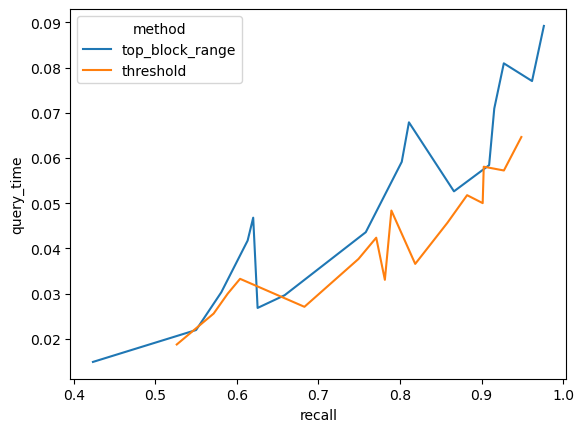

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=plot_df, x="recall", y="query_time", hue="method")

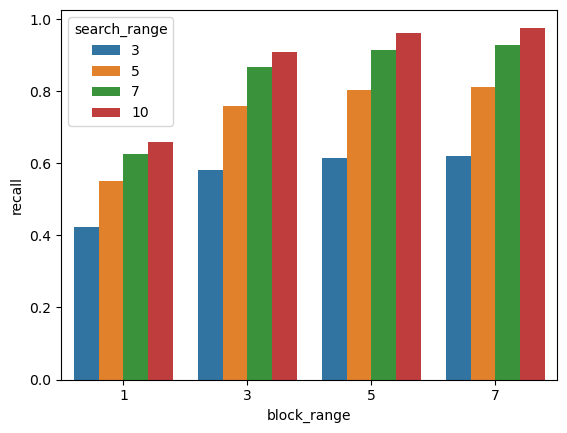

In [5]:
df["block_range"] = df["l_range"]
df["search_range"] = df["g_range"]
ax = sns.barplot(data=df, x="block_range", y="recall", hue="search_range")
ax.set(xlabel='block_range', ylabel='recall')
plt.show()

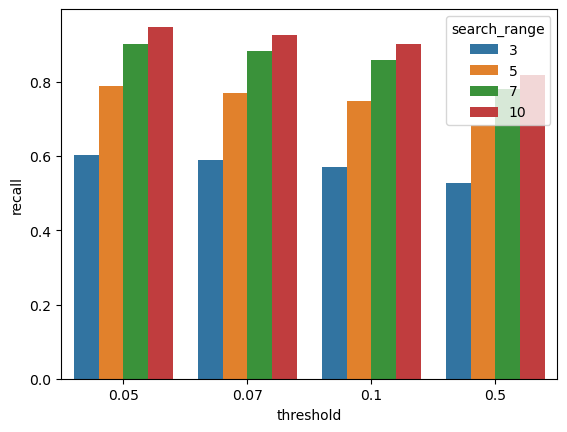

In [6]:
threshold_df["search_range"] = threshold_df["g_range"]
sns.barplot(data=threshold_df,  x="threshold", y="recall", hue="search_range")
ax.set( ylabel='recall')
plt.show()

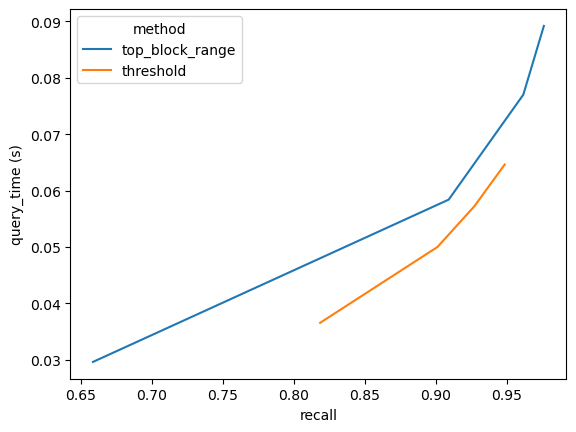

In [7]:
ax = sns.lineplot(data=plot_df[plot_df['g_range'] == 10], x="recall", y="query_time", hue="method")
ax.set( xlabel='recall', ylabel='query_time (s)')
plt.show()

In [8]:
plot_df[plot_df['g_range'] == 10]

,query_time,recall,g_range,l_range,method,threshold
12,0.029633,0.6585,10,1.0,top_block_range,NaN
13,0.058405,0.9092,10,3.0,top_block_range,NaN
14,0.077011,0.9618,10,5.0,top_block_range,NaN
15,0.089202,0.9763,10,7.0,top_block_range,NaN
12,0.036565,0.8186,10,NaN,threshold,0.50
13,0.050008,0.9013,10,NaN,threshold,0.10
14,0.057228,0.9273,10,NaN,threshold,0.07
15,0.064632,0.9487,10,NaN,threshold,0.05
